# python数据分析大作业——幸福指数预测

## 数据集探索
数据来自中国人民大学中国调查与数据中心主持之《中国综合社会调查（CGSS）》项目。中国综合社会调查为多阶分层抽样的截面面访调查。选取其中多组变量，包括个体变量（性别、年龄、地域、职业、健康、婚姻与政治面貌等等）、家庭变量（父母、配偶、子女、家庭资本等等）、社会态度（公平、信用、公共服务等等），来预测其对幸福感的评价。


 4    4818
 5    1410
 3    1159
 2     497
 1     104
-8      12
Name: happiness, dtype: int64

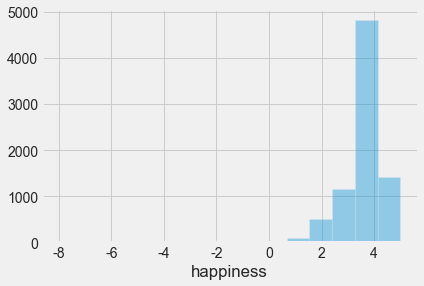

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# plt.rcParams['font.sans-serif']=['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号

#读取并划分变量
df = pd.read_csv('happiness_train_abbr.csv')
# x_df = df.drop('happiness',axis = 1)
y_df = df['happiness']

sns.distplot(y_df, bins=15, kde=False)
y_df.value_counts()


In [71]:
df_clear = df.drop(df[df['happiness']<0].index)
sample_size = len(df_clear)
for col in df_clear.columns:
    nan_num = df_clear[col].isnull().sum()
    if pd.api.types.is_numeric_dtype(df_clear[col]):
        negative_num = (df_clear[col] < 0.01).sum()
        print(f'{col}: nan {nan_num}/{sample_size}, {nan_num/sample_size}, negative {negative_num}/{sample_size}, {negative_num/sample_size}')
    else:
        print(f'{col}: nan {nan_num}/{sample_size}, {nan_num/sample_size}')

id: nan 0/7988, 0.0, negative 0/7988, 0.0
happiness: nan 0/7988, 0.0, negative 0/7988, 0.0
survey_type: nan 0/7988, 0.0, negative 0/7988, 0.0
province: nan 0/7988, 0.0, negative 0/7988, 0.0
city: nan 0/7988, 0.0, negative 0/7988, 0.0
county: nan 0/7988, 0.0, negative 0/7988, 0.0
survey_time: nan 0/7988, 0.0
gender: nan 0/7988, 0.0, negative 0/7988, 0.0
birth: nan 0/7988, 0.0, negative 0/7988, 0.0
nationality: nan 0/7988, 0.0, negative 18/7988, 0.002253380070105158
religion: nan 0/7988, 0.0, negative 950/7988, 0.11892839258888332
religion_freq: nan 0/7988, 0.0, negative 15/7988, 0.0018778167250876315
edu: nan 0/7988, 0.0, negative 9/7988, 0.001126690035052579
income: nan 0/7988, 0.0, negative 1632/7988, 0.20430645968953431
political: nan 0/7988, 0.0, negative 39/7988, 0.0048823234852278415
floor_area: nan 0/7988, 0.0, negative 0/7988, 0.0
height_cm: nan 0/7988, 0.0, negative 0/7988, 0.0
weight_jin: nan 0/7988, 0.0, negative 0/7988, 0.0
health: nan 0/7988, 0.0, negative 3/7988, 0.0003755

In [72]:
numeric_columns = ['birth','religion_freq','edu','income','floor_area','height_cm','weight_jin','health','health_problem','depression','equity','class',
# 'work_status','work_yr','work_type','work_manage',
'family_income','family_m','family_status','house','car','status_peer','status_3_before','view']
classification_columns = ['survey_type',
'province','city','county',
'gender','nationality','religion','political','hukou','socialize','relax','learn','work_exper','marital','inc_ability']
drop_columns = ['survey_time',
# 'province' , 'city', 'county',
'work_status','work_yr','work_type','work_manage']
df.columns

Index(['id', 'happiness', 'survey_type', 'province', 'city', 'county',
       'survey_time', 'gender', 'birth', 'nationality', 'religion',
       'religion_freq', 'edu', 'income', 'political', 'floor_area',
       'height_cm', 'weight_jin', 'health', 'health_problem', 'depression',
       'hukou', 'socialize', 'relax', 'learn', 'equity', 'class', 'work_exper',
       'work_status', 'work_yr', 'work_type', 'work_manage', 'family_income',
       'family_m', 'family_status', 'house', 'car', 'marital', 'status_peer',
       'status_3_before', 'view', 'inc_ability'],
      dtype='object')

In [73]:
for col in df_clear.columns:
    series = df_clear[col]
    if col in classification_columns:
        print(f'{col}: {len(series.unique())}')

survey_type: 2
province: 28
city: 85
county: 130
gender: 2
nationality: 9
religion: 3
political: 5
hukou: 8
socialize: 6
relax: 6
learn: 6
work_exper: 6
marital: 7
inc_ability: 5


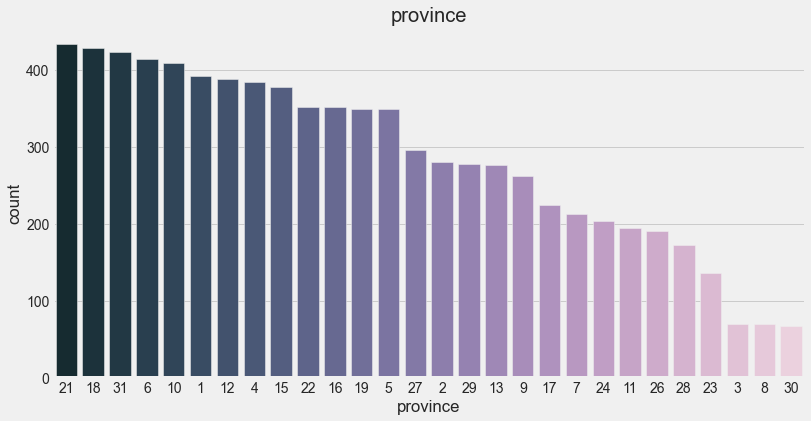

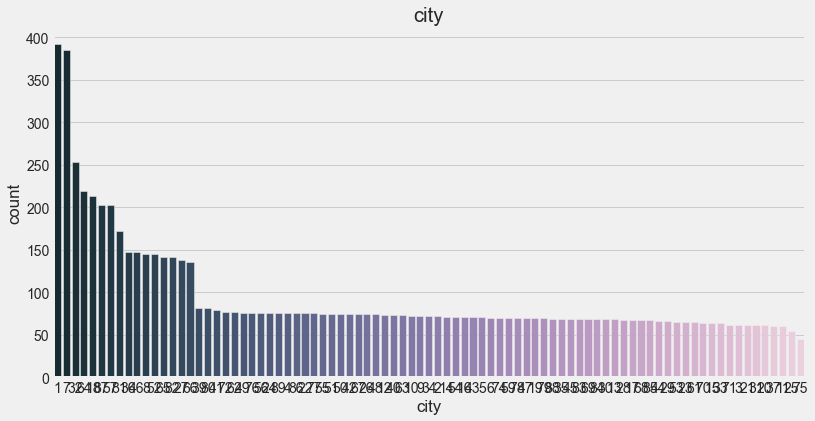

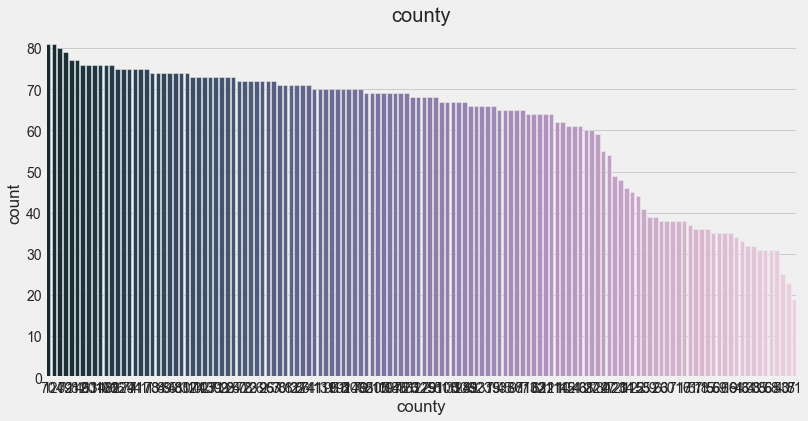

In [74]:
for col in ['province', 'city', 'county']:
    fig, axis1 = plt.subplots(1,1,figsize=(12,6))
    class_num = pd.DataFrame({col:df_clear[col].values})
    sns.countplot(x=col, data=class_num, order=df_clear[col].value_counts().index, palette='ch:s=2.3,rot=.53,reverse=1')
    axis1.set_title(col)

## 数据预处理


In [75]:
df_clear = df_clear.drop(drop_columns, axis=1)
for col in df_clear.columns:
    series = df_clear[col]
    if col in numeric_columns:
        df_clear.loc[series.isnull(), col] = series.mean()
        df_clear.loc[series < 0.01, col] = series.mean()
    elif col in classification_columns:
        df_clear.loc[series.isnull(), col] = series.mode()[0]
        df_clear.loc[series < 0.01, col] = series.mode()[0]
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_clear.loc[:, numeric_columns] = scaler.fit_transform(df_clear.loc[:, numeric_columns])
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
embeddings = encoder.fit_transform(df_clear.loc[:, classification_columns])
df_clear = df_clear.drop(classification_columns, axis=1)
df_clear = pd.concat([df_clear, pd.DataFrame(embeddings)], axis=1)
df_clear = df_clear.dropna(axis=0)
df_clear.describe()

,id,happiness,birth,religion_freq,edu,income,floor_area,height_cm,weight_jin,health,...,290,291,292,293,294,295,296,297,298,299
count,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,...,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000,7976.000000
mean,3995.596540,3.868104,-0.000257,0.000496,-0.000372,-0.000023,-0.001274,0.000075,0.000232,-0.000437,...,0.006520,0.757146,0.018180,0.003260,0.021439,0.089895,0.014669,0.696841,0.261535,0.026956
std,2306.398885,0.818841,1.000021,1.000733,0.999992,1.000793,0.997930,0.999907,1.000146,1.000482,...,0.080485,0.428834,0.133609,0.057005,0.144853,0.286049,0.120232,0.459652,0.439498,0.161965
min,1.000000,1.000000,-2.594015,-0.329865,-1.249045,-0.172459,-1.286821,-6.182121,-3.517980,-2.435214,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1998.750000,4.000000,-0.753964,-0.329865,-0.607886,-0.126233,-0.588184,-0.740220,-0.714817,-0.566023,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3997.500000,4.000000,0.017670,-0.329865,-0.287307,-0.043672,-0.221687,0.001858,-0.067933,0.368573,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,5993.250000,4.000000,0.729948,-0.329865,0.353852,-0.017872,0.167717,0.743935,0.622076,0.368573,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,7988.000000,5.000000,1.917078,5.604058,2.918487,42.827808,13.567792,3.341207,5.969649,1.303168,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


将数据分为训练集和测试集.

In [76]:
# 划分变量
y_df = df_clear['happiness']
x_df = df_clear.drop(['happiness','id'],axis = 1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_df,y_df,test_size=0.2, random_state=123)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold



机器学习模型

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

model_list = []
model_name_list = []
score_list = []

model_list.append(LogisticRegression(solver='newton-cg', C=0.1, max_iter=10000, random_state=123))
# model_list.append(LinearRegression())
model_list.append(Ridge(alpha=2000.0, max_iter=100000, random_state=123))
model_list.append(ElasticNet(alpha=0.05, l1_ratio=0.2, max_iter=10000, random_state=123))
model_list.append(SVR(C=0.01, gamma=0.1))
model_list.append(GradientBoostingRegressor(loss='huber', max_features='sqrt', n_estimators=500, random_state=123))
model_list.append(RandomForestRegressor(n_estimators=300, max_depth=6, min_samples_split=3, random_state=123))
model_list.append(LGBMRegressor(n_estimators=200, num_leaves=31, learning_rate=0.01, random_state=123))


for model in model_list:
    raw_cls_name = str(type(model))
    model_name = raw_cls_name[raw_cls_name.rfind('.') + 1:raw_cls_name.rfind("'")]
    model_name_list.append(model_name)

for model, model_name in zip(model_list, model_name_list):
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    score = mean_absolute_error(y_predict,y_test)
    score_list.append(score)
    print(f'{model_name}: {score}')

LogisticRegression: 0.44298245614035087
Ridge: 0.5150818714532586
ElasticNet: 0.5186253350948621
SVR: 0.478170051292041
GradientBoostingRegressor: 0.5040851174761165
RandomForestRegressor: 0.49320142092848857
LGBMRegressor: 0.4843957102690727


## 模型融合

In [79]:
class Stacking(object):
    def __init__(self, n_folds, rand_seed, base_models, stackers, weights):
        assert np.array(weights).sum() == 1.0
        self.y_dim = 1
        self.n_folds = n_folds
        self.rand_seed = rand_seed
        self.base_models = base_models
        self.stackers = stackers
        self.weights = weights

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape((y.shape[0], -1))

        self.y_dim = y.shape[1]

        kf = KFold(n_splits=self.n_folds, shuffle=True,
                   random_state=self.rand_seed)

        s_train = np.zeros((X.shape[0], self.y_dim, len(self.base_models)))

        for i, mod in enumerate(self.base_models):
            j = 0
            for idx_train, idx_valid in kf.split(range(len(y))):
                x_train_j = X[idx_train]
                y_train_j = y[idx_train, :]
                x_valid_j = X[idx_valid]

                mod.fit(x_train_j, y_train_j.ravel())

                y_valid_j = mod.predict(x_valid_j)[:].reshape((-1, 1))
                s_train[idx_valid, :, i] = y_valid_j

                j += 1

        for stacker in self.stackers:
            stacker.fit(s_train.reshape(s_train.shape[0], -1), y.ravel())

    def predict(self, T):
        T = np.array(T)
        s_test = np.zeros((T.shape[0], self.y_dim, len(self.base_models)))
        y_predict = np.zeros((T.shape[0], self.y_dim, len(self.stackers)))
        y_predict_weighted = np.zeros((T.shape[0], self.y_dim))

        for i, mod in enumerate(self.base_models):
            s_test[:, :, i] = mod.predict(T).reshape((-1, 1))

        for i, stacker in enumerate(self.stackers):
            tmp_y_predict = stacker.predict(s_test.reshape((s_test.shape[0], -1)))
            y_predict[:, :, i] = np.array(tmp_y_predict).reshape((-1,1))

            y_predict_weighted += y_predict[:, :, i].reshape(y_predict_weighted.shape) * self.weights[i]

        return y_predict_weighted

    def fit_predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y).reshape((y.shape[0], -1))
        T = np.array(T)

        self.y_dim = y.shape[1]

        kf = KFold(n_splits=self.n_folds, shuffle=True,
                   random_state=self.rand_seed)

        s_train = np.zeros((X.shape[0], (len(self.base_models)), self.y_dim))
        s_test = np.zeros((T.shape[0], (len(self.base_models)), self.y_dim))
        y_predict = np.zeros((T.shape[0], (len(self.stackers)), self.y_dim))
        y_predict_weighted = np.zeros((T.shape[0], self.y_dim))

        for i, mod in enumerate(self.base_models):
            s_test_i = np.zeros((
                s_test.shape[0], kf.get_n_splits(), self.y_dim))

            j = 0
            for idx_train, idx_valid in kf.split(range(len(y))):
                x_train_j = X[idx_train]
                y_train_j = y[idx_train, :]
                x_valid_j = X[idx_valid]

                mod.fit(x_train_j, y_train_j.ravel())

                y_valid_j = mod.predict(x_valid_j).reshape((-1, 1))
                s_train[idx_valid, i, :] = y_valid_j
                s_test_i[:, j, :] = mod.predict(T).reshape((-1, 1))

                j += 1

            s_test[:, i, :] = s_test_i.mean(1)

        for stacker in self.stackers:
            stacker.fit(s_train.reshape((s_train.shape[0], -1)), y.ravel())

        for i, stacker in enumerate(self.stackers):
            temp_y_predict = stacker.predict(
                s_test.reshape((s_test.shape[0], -1)))
            y_predict[:, i, :] = temp_y_predict[:].reshape((-1, 1))
            y_predict_weighted += y_predict[:, i, :] * self.weights[i]

        stackers_num = len(self.stackers)
        for i, result in enumerate(self.added_results):
            y_predict_weighted += result * self.weights[stackers_num + i]

        return y_predict_weighted

stacking = Stacking(n_folds=5, rand_seed=123, base_models=model_list, stackers=[
    LogisticRegression(C=0.1, max_iter=1000, random_state=123)
    ], weights=[1.0])

stacking.fit(X_train,y_train)
y_predict = stacking.predict(X_test)
score = mean_absolute_error(y_predict,y_test)
print(f'Stacking: {score}')

Stacking: 0.43358395989974935
